In [1]:
import numpy as np
import sacc

In [2]:
sb = sacc.Sacc.load_fits('../../TXPipe/data/desy1/outputs/gammat_bright_stars.sacc')
sd = sacc.Sacc.load_fits('../../TXPipe/data/desy1/outputs/gammat_dim_stars.sacc')

/opt/conda/lib/python3.10/site-packages/sacc/data_types.py:304: UserWarning: Unknown data_type value galaxyStar_shearDensity_xi_t. If possible use a pre-defined type, or add to the list.
  warnings.warn(f"Unknown data_type value {data_type}. "


In [3]:
sb.get_data_types()

['galaxyStar_shearDensity_xi_t']

In [4]:
sb_thetaxi = sb.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','bright_stars')

In [5]:
sd.get_tracer_combinations('galaxyStar_shearDensity_xi_t')

[('source2d', 'dim_stars')]

In [6]:
sb.get_tag('theta')

[2.829446548012813,
 3.5620308774659826,
 4.484352664809446,
 5.645664794502071,
 7.10759471771236,
 8.94886422453803,
 11.264221039941232,
 14.180843734046677,
 17.8538479690707,
 22.474112668457526,
 28.295140537931577,
 35.618596855178836,
 44.839706187708956,
 56.44776552773119,
 71.05977972190215,
 89.45341362356334,
 112.60962922648879,
 141.75275405373304,
 178.43912852202843,
 224.60088146121336]

In [7]:
sd_thetaxi = sd.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','dim_stars')

In [8]:
sb_thetaxi

(array([  2.82944655,   3.56203088,   4.48435266,   5.64566479,
          7.10759472,   8.94886422,  11.26422104,  14.18084373,
         17.85384797,  22.47411267,  28.29514054,  35.61859686,
         44.83970619,  56.44776553,  71.05977972,  89.45341362,
        112.60962923, 141.75275405, 178.43912852, 224.60088146]),
 array([-5.28905066e-05, -5.45552603e-05,  4.95651052e-06, -1.19593312e-05,
        -6.06319235e-06,  1.08722879e-05,  4.59834356e-06,  2.30668930e-07,
         2.13949569e-06, -2.48414351e-08,  6.51282296e-06,  4.59928463e-06,
        -6.04977882e-06,  2.75532881e-06, -6.06949420e-06, -3.83764140e-06,
         3.73292021e-08,  9.52193338e-06,  1.29076965e-05,  5.96428943e-06]))

In [9]:
sb_err = sb.get_tag('error')

In [10]:
sb_err=np.array(sb_err)

In [11]:
sb_err

array([5.12146317e-05, 4.44025850e-05, 3.50999986e-05, 2.46785839e-05,
       1.91665604e-05, 1.80633125e-05, 1.58740951e-05, 1.22286778e-05,
       1.33976740e-05, 9.64829991e-06, 9.69436544e-06, 8.97765404e-06,
       9.38947715e-06, 9.40303450e-06, 1.22458395e-05, 1.32070133e-05,
       1.31940269e-05, 1.62141566e-05, 1.77708850e-05, 1.63736018e-05])

In [12]:
sd_err = np.array(sd.get_tag('error'))

In [13]:
import matplotlib
font = {}
font = {'family': 'Serif',
        'size'   : '12'}

matplotlib.rc('font', **font)

/tmp/ipykernel_547191/2427229761.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.000,2.1e2])


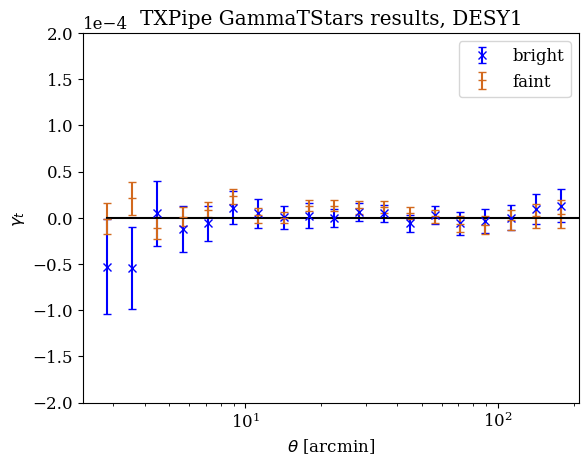

In [14]:
import matplotlib.pyplot as plt
plt.errorbar(sb_thetaxi[0],sb_thetaxi[1],sb_err,marker='x',color='blue',linestyle='None',label='bright',capsize=3)
plt.errorbar(sd_thetaxi[0],sd_thetaxi[1],sd_err,marker='_',color='chocolate',linestyle='None',label='faint',capsize=3)
plt.plot(sd_thetaxi[0],np.zeros(len(sd_thetaxi[0])),color='black')
plt.xscale('log')
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2e-4,2e-4))
plt.ylim([-2e-4,2e-4])
plt.xlim([0.000,2.1e2])
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$\gamma_t$')
plt.title('TXPipe GammaTStars results, DESY1')
plt.savefig('../plots/desy1_gammaTstars.png')

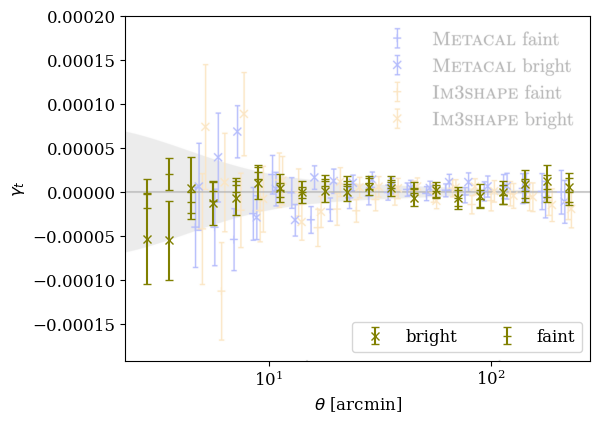

In [31]:
# overlay y1 published results

import matplotlib.ticker as ticker

fig = plt.figure(figsize=(6,4.5))
img = plt.imread("zuntz2018/gammaTstars.png")

#set first axes
ax = fig.add_subplot(1,1,1)
ax.imshow(img,  aspect='equal',alpha=0.3)
plt.axis('off')

#create second axes
newax = fig.add_axes(ax.get_position(), frameon=True)
newax.patch.set_alpha(0.0)
newax.set_ylim([-1.91e-4,2e-4])
#newax.set_xlim([0.000,2.1e2])
newax.set_xlabel(r'$\theta$ [arcmin]')
newax.set_ylabel(r'$\gamma_t$')
newax.set_xscale('log')
#newax.set_yscale('symlog',linthresh=1e-6)

#Change formatting of xticks
newax.xaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))
#plot point

plt.errorbar(sb_thetaxi[0],sb_thetaxi[1],sb_err,marker='x',color='olive',linestyle='None',label='bright',capsize=3)
plt.errorbar(sd_thetaxi[0],sd_thetaxi[1],sd_err,marker='_',color='olive',linestyle='None',label='faint',capsize=3)


plt.gca().minorticks_off()
plt.legend(ncol=2,loc='lower right')